In [ ]:
#Importing our needed packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
from sklearn.model_selection import cross_val_score



---


# Let's import our data set and set the corresponding column names.


---



In [ ]:
url='https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv'
col_names = ["Number of times pregnant",
"Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
"Diastolic blood pressure (mm Hg)",
"Triceps skin fold thickness (mm)",
"2-Hour serum insulin (mu U/ml)",
"Body mass index (weight in kg/(height in m)^2)",
"Diabetes pedigree function",
"Age (years)",
"Class variable (0 or 1)]"]
dataframe = pd.read_csv(url,skiprows=9,names=col_names)

In [ ]:
dataframe.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)]
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




---


# We need to sort through our data to make sure that there does not exist any unknown values or outliers.



---



In [ ]:
dataframe.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable (0 or 1)]                                                      int64
dtype: object

In [ ]:
dataframe['Number of times pregnant'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
dataframe['Age (years)'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [ ]:
dataframe['2-Hour serum insulin (mu U/ml)'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39



---


# We see that the first value is 0, so we need to take note and account for this later. Let's see how many entries have the value 0.


---



In [ ]:
dataframe['2-Hour serum insulin (mu U/ml)'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: 2-Hour serum insulin (mu U/ml), Length: 186, dtype: int64



---


# There are a whopping 374 instances of a 0 value.


---



In [ ]:
dataframe['Body mass index (weight in kg/(height in m)^2)'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [ ]:
dataframe['Body mass index (weight in kg/(height in m)^2)'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: Body mass index (weight in kg/(height in m)^2), Length: 248, dtype: int64



---


# Another 0, 11 instances.


---



In [ ]:
dataframe['Class variable (0 or 1)]'].unique()

array([1, 0])

In [ ]:
dataframe['Class variable (0 or 1)]'].value_counts()

0    500
1    268
Name: Class variable (0 or 1)], dtype: int64



---


# So overall we have 500 people who are non diabetic (~66%) and 268 who are (~33%).


---



In [ ]:
dataframe['Diabetes pedigree function'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [ ]:
dataframe['Diastolic blood pressure (mm Hg)'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [ ]:
dataframe['Diastolic blood pressure (mm Hg)'].value_counts()

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: Diastolic blood pressure (mm Hg), dtype: int64



---


# Again another 35 instances of a value of 0. We will account for these later.


---



In [ ]:
dataframe['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [ ]:
dataframe['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].value_counts()

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Plasma glucose concentration a 2 hours in an oral glucose tolerance test, Length: 136, dtype: int64



---


# Another 0 value, but negligible.


---



In [ ]:
dataframe['Triceps skin fold thickness (mm)'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [ ]:
dataframe['Triceps skin fold thickness (mm)'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: Triceps skin fold thickness (mm), dtype: int64



---


# And one more 0 with 227 instances. Let's remove the rows that have 0's for the instances that will not dramatically decrease our sample size.


---



In [ ]:
df_complete = dataframe.drop(dataframe['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'].loc[dataframe['Plasma glucose concentration a 2 hours in an oral glucose tolerance test']==0].index)
df_complete = dataframe.drop(dataframe['Body mass index (weight in kg/(height in m)^2)'].loc[dataframe['Body mass index (weight in kg/(height in m)^2)']==0].index)
df_complete = dataframe.drop(dataframe['Diastolic blood pressure (mm Hg)'].loc[dataframe['Diastolic blood pressure (mm Hg)']==0].index)

len(df_complete)

733

In [ ]:
df_complete['Class variable (0 or 1)]'].value_counts()

0    481
1    252
Name: Class variable (0 or 1)], dtype: int64

---


# So, we removed 35 data points (4% of the data set) and are left with 481 non diabetic and 252 diabetic.


---


In [ ]:
df_complete.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)]
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




---


# Now we have cleaned our data set from *most* missing values and may begin to construct our decision tree. Let's split our data frame into the columns used for classification and our parameter of interest, labeled as the class variable in our current dataframe.


---



In [ ]:
X = df_complete.drop('Class variable (0 or 1)]', axis=1).copy()
X.head()
len(X)

733

In [ ]:
Y=df_complete['Class variable (0 or 1)]'].copy()
Y.head()
len(Y)

733



---
# Alright so let's actually build the damn tree already! Let's get our test and training data seperated and feed it into SciKits DecisionTreeClassifier. Note that the default criterion for DecisionTreeClassifier is 'gini' but we want to use 'entropy' instead. We pass it absolutely no other arguments, since later on we will have other methods to completely determine the optimal parameters.
---





In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=20,test_size=.1)
X_train2,  X_fakeTest, Y_train2, Y_fakeTest = train_test_split(X_train,Y_train, random_state=20, test_size=.1)

---

# Notice that we created two test sets.  The first one labeled *X_test, Y_test* will be used at the end of the model with the 5-fold validation. The second one which is a subset of our training data labelled *X_fakeTest, Y_fakeTest*, will be used to test the initial decision tree and the pruning steps.

---

In [ ]:
X_train2

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
381,0,105,68,22,0,20.0,0.236,22
10,4,110,92,0,0,37.6,0.191,30
481,0,123,88,37,0,35.2,0.197,29
615,3,106,72,0,0,25.8,0.207,27
594,6,123,72,45,230,33.6,0.733,34
...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37
116,5,124,74,0,0,34.0,0.220,38
176,6,85,78,0,0,31.2,0.382,42
240,1,91,64,24,0,29.2,0.192,21


In [ ]:
first_dt = DecisionTreeClassifier(criterion='entropy',random_state=20)
first_dt= first_dt.fit(X_train2,Y_train2)
len(Y_train2)

593

In [ ]:
len(Y_fakeTest)
len(X_fakeTest)

66

In [ ]:
Y_fakeTest.value_counts()

0    42
1    24
Name: Class variable (0 or 1)], dtype: int64



---


# This is the true values for diabetic and non diabetic in our training test set (training subset), these will be important.

---



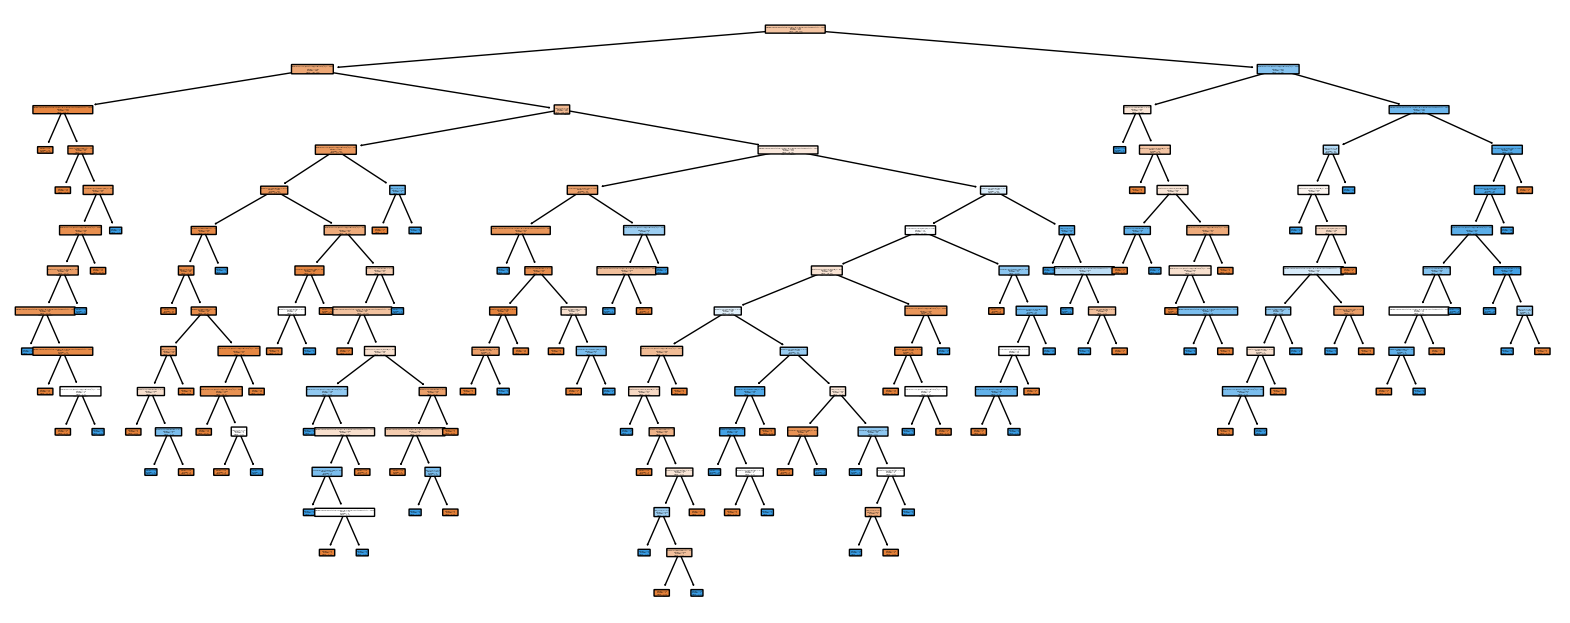

In [ ]:
plt.figure(figsize=(20,8),dpi=100)
plot_tree(first_dt, filled=True, rounded=True, class_names=["Non-Diabetic","Diabetic"], feature_names=X.columns);



---


# This tree is huge, which suggests overfitting. Lets plot a confusion matrix to see how our tree would respond to the training test set.


---



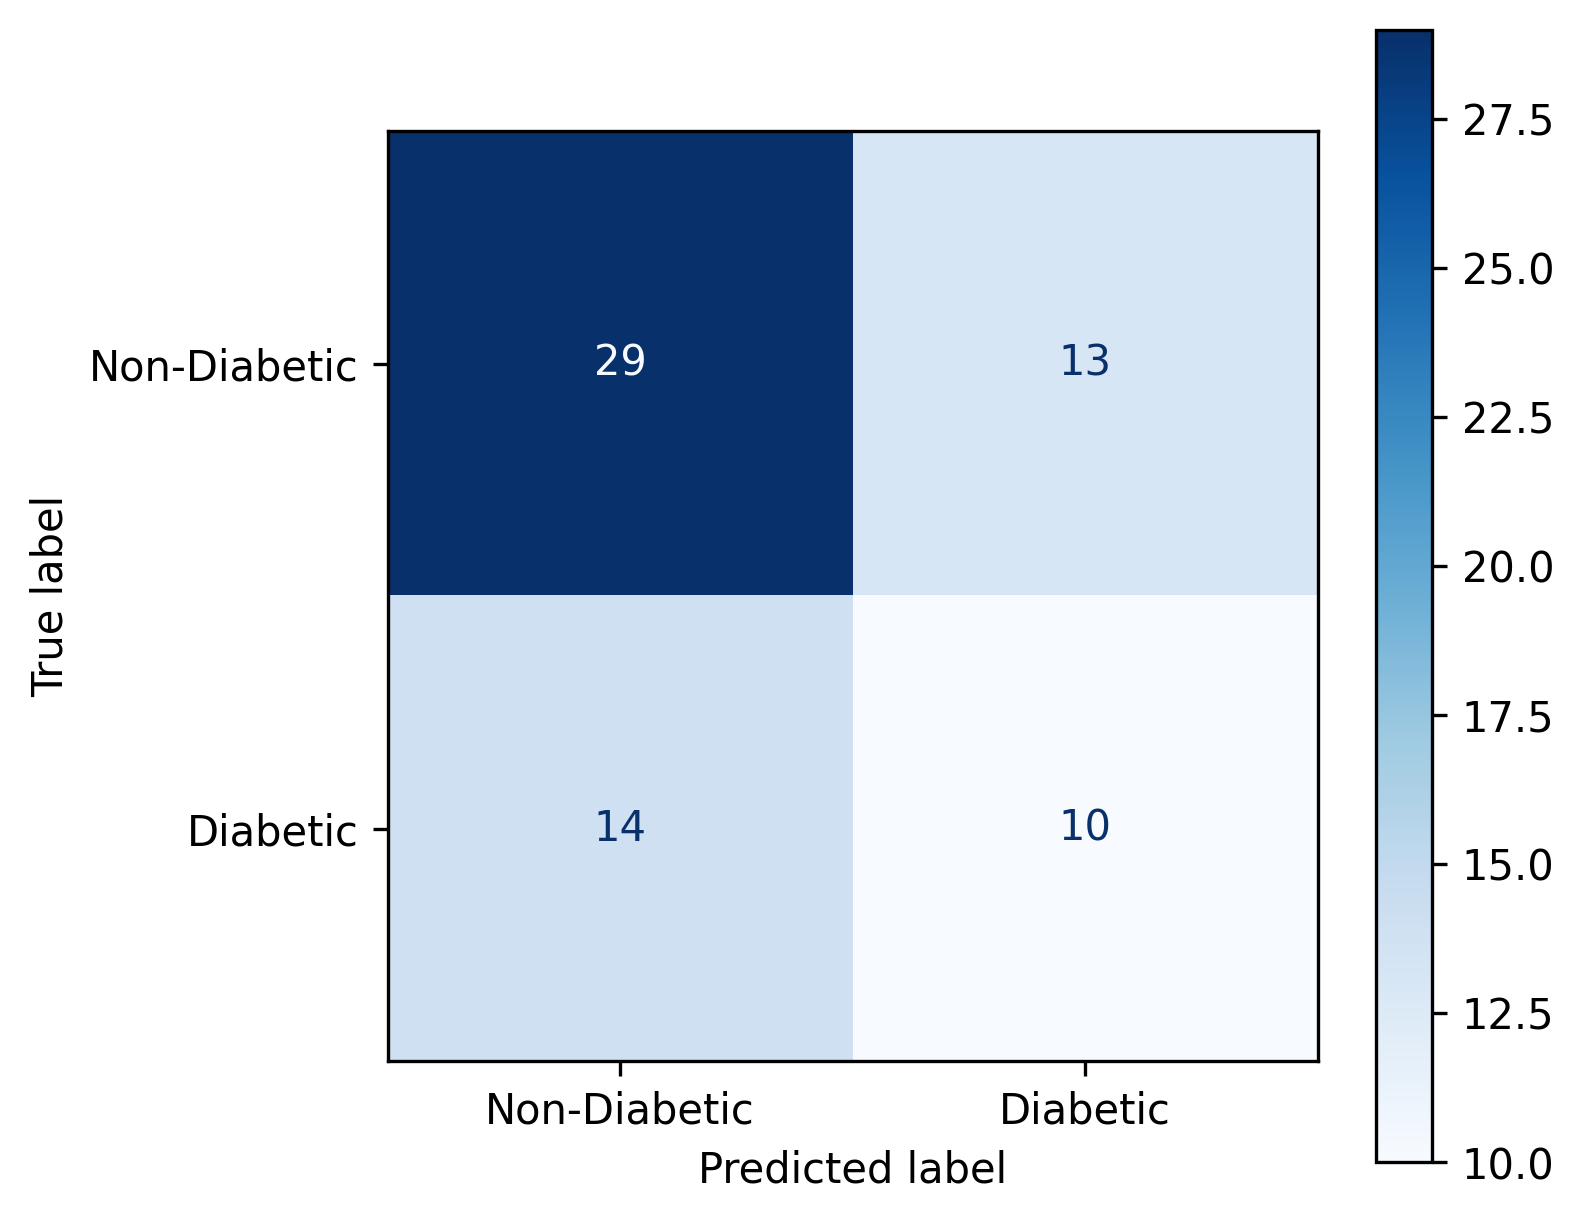

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5),dpi=300)
plot_confusion_matrix(first_dt, X_fakeTest, Y_fakeTest, display_labels=["Non-Diabetic","Diabetic"],cmap=plt.cm.Blues,ax=ax);



---


# Our first tree did not perform as well as we would have hoped.  Let's try to improve this by pruning our tree and optimizing the parameters that we have. We're going to accomplish this by something called cost complexity pruning that will help improve our accuracy. We will define a list of 'alpha' values that will have a one to one correspondance with every subtree generated by cost_complexity_pruning_path.

---



In [ ]:
tree_path=first_dt.cost_complexity_pruning_path(X_train2,Y_train2)
ccp_alphas=tree_path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]
impurities=tree_path.impurities
len(ccp_alphas)

61

In [ ]:
impurities

array([0.        , 0.00547237, 0.00884505, 0.01221773, 0.01559041,
       0.01896309, 0.02714986, 0.03644121, 0.04573257, 0.05037825,
       0.06523982, 0.08559373, 0.09086903, 0.09623082, 0.10170319,
       0.10717555, 0.11264792, 0.12906501, 0.13453738, 0.14003633,
       0.15108383, 0.16216969, 0.16819293, 0.21050715, 0.21659424,
       0.22268132, 0.22883897, 0.23499661, 0.24115426, 0.24731273,
       0.2534712 , 0.26583736, 0.27862624, 0.28510563, 0.29820675,
       0.30478371, 0.31136066, 0.31793762, 0.33109629, 0.33773108,
       0.34470412, 0.3520372 , 0.38185062, 0.3972535 , 0.40514211,
       0.43815259, 0.44656232, 0.45553447, 0.46499201, 0.48443644,
       0.5042985 , 0.51458495, 0.5802916 , 0.59151189, 0.60388521,
       0.63040274, 0.65699653, 0.67193435, 0.69501967, 0.73870048,
       0.79861261, 0.9301689 ])



---

# SciKit has a really nice function that gives us every subtree possible by pruning leaves off of the parent tree that will help us find our optimal tree. We disregard the maximum value of ccp_alphas since that would only leave us the root node.


---



In [ ]:
first_dts=[]

for ccp_alpha in ccp_alphas:
    first_dt = DecisionTreeClassifier(criterion='entropy',random_state=20, ccp_alpha=ccp_alpha)
    first_dt.fit(X_train2, Y_train2)
    first_dts.append(first_dt)



---

# We create an array to store every single decision tree that we could construct for each combination of leaves pruned off the original tree. I like to think of this as a pseudo-random forest, since it is a forest of subtrees. Let's see how the data is classified based upon which tree it is being evaluated on. 


---



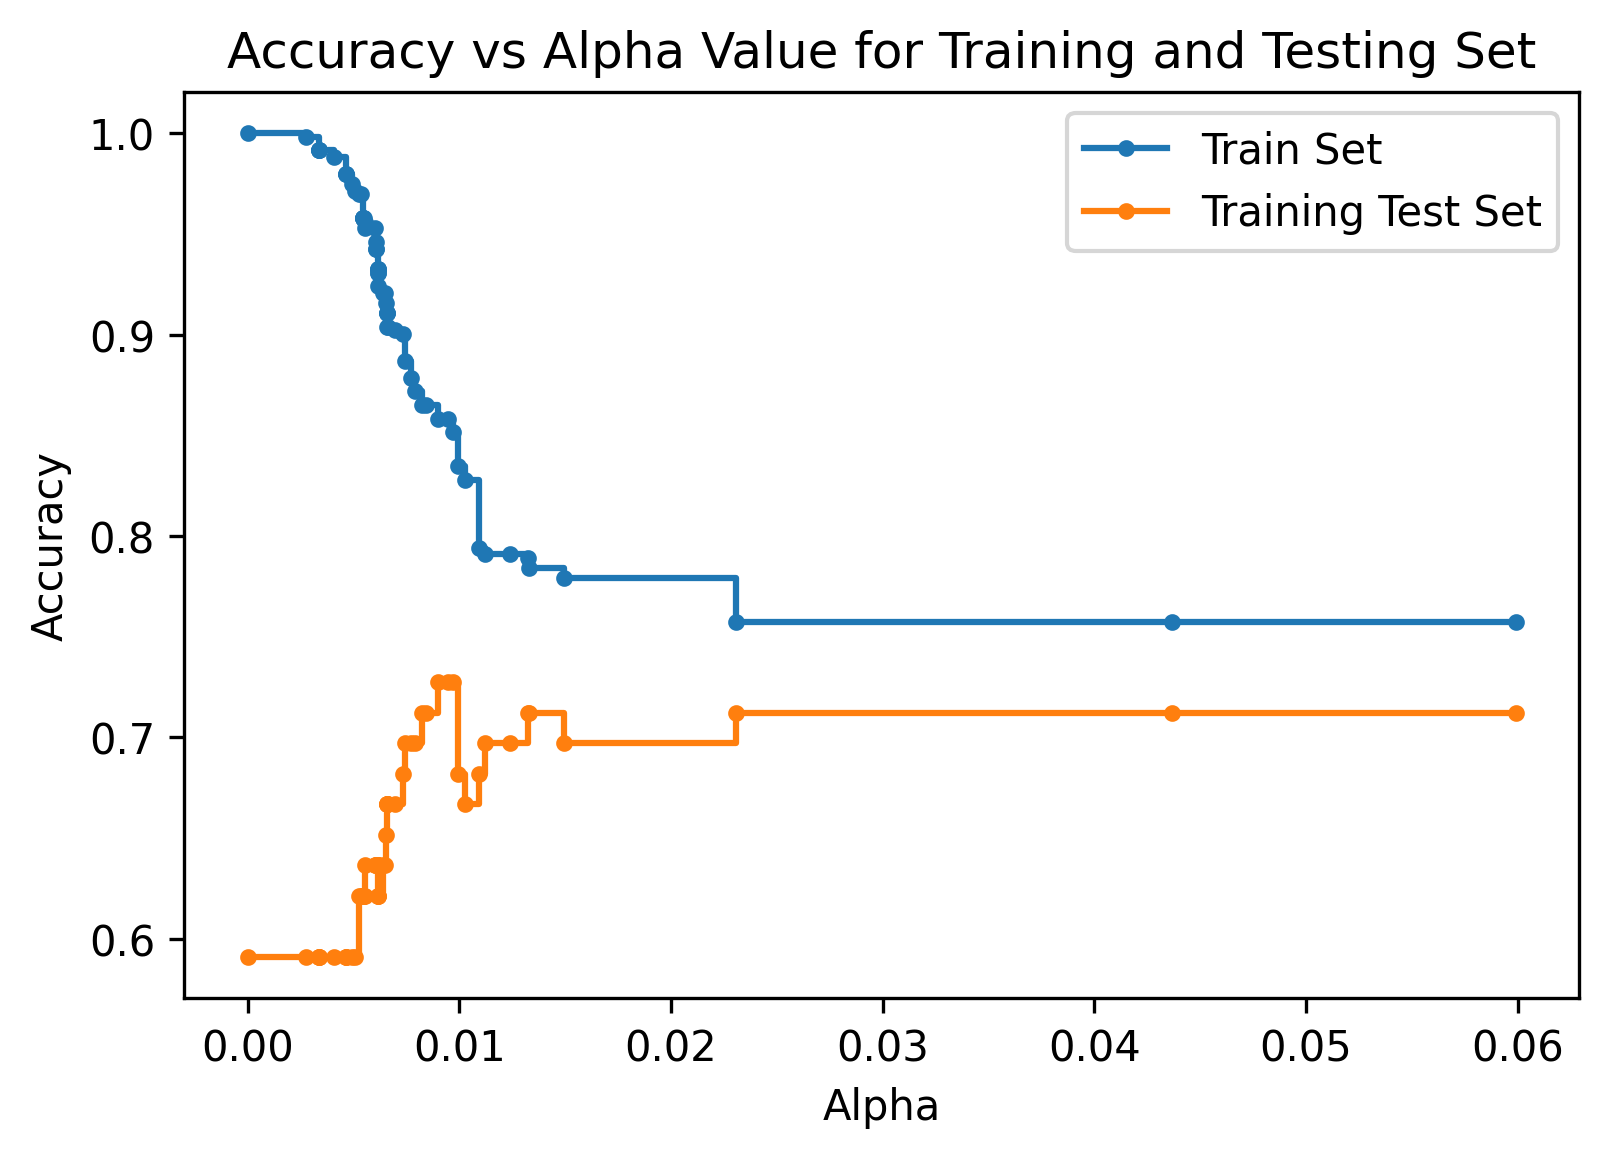

In [ ]:
train_scores = [first_dt.score(X_train2, Y_train2) for first_dt in first_dts]
training_test_scores = [first_dt.score(X_fakeTest, Y_fakeTest) for first_dt in first_dts]

fig, ax = plt.subplots(figsize=(6,4),dpi=300)
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha Value for Training and Testing Set")
ax.plot(ccp_alphas, train_scores, marker='.', label="Train Set",
        drawstyle="steps-post")
ax.plot(ccp_alphas, training_test_scores, marker='.', label="Training Test Set",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
train_scores

[1.0,
 0.9983136593591906,
 0.9915682967959528,
 0.9915682967959528,
 0.9915682967959528,
 0.9915682967959528,
 0.9881956155143339,
 0.9797639123102867,
 0.9797639123102867,
 0.9797639123102867,
 0.9747048903878583,
 0.9713322091062394,
 0.96964586846543,
 0.96964586846543,
 0.9578414839797639,
 0.9578414839797639,
 0.9578414839797639,
 0.9578414839797639,
 0.9578414839797639,
 0.9578414839797639,
 0.9561551433389545,
 0.9527824620573356,
 0.9527824620573356,
 0.9460370994940978,
 0.9426644182124789,
 0.9426644182124789,
 0.9325463743676222,
 0.9325463743676222,
 0.9325463743676222,
 0.9308600337268128,
 0.9308600337268128,
 0.924114671163575,
 0.9207419898819561,
 0.9207419898819561,
 0.9156829679595279,
 0.9106239460370995,
 0.9106239460370995,
 0.9106239460370995,
 0.9038785834738617,
 0.9038785834738617,
 0.9021922428330523,
 0.9005059021922428,
 0.8870151770657673,
 0.8785834738617201,
 0.8718381112984823,
 0.8650927487352446,
 0.8650927487352446,
 0.8583473861720068,
 0.858347386

In [ ]:
training_test_scores

[0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.6212121212121212,
 0.6212121212121212,
 0.6212121212121212,
 0.6212121212121212,
 0.6212121212121212,
 0.6212121212121212,
 0.6212121212121212,
 0.6212121212121212,
 0.6212121212121212,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.6363636363636364,
 0.6212121212121212,
 0.6212121212121212,
 0.6212121212121212,
 0.6363636363636364,
 0.6363636363636364,
 0.6515151515151515,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6818181818181818,
 0.696969696969697,
 0.696969696969697,
 0.696969696969697,
 0.7121212121212122,
 0.7121212121212122,
 0.7272727272727

In [ ]:
print(max(training_test_scores))
print(training_test_scores.index(max(training_test_scores)))

0.7272727272727273
47


In [ ]:
ccp_alphas

array([0.        , 0.00273618, 0.00337268, 0.00337268, 0.00337268,
       0.00337268, 0.00409338, 0.00464568, 0.00464568, 0.00464568,
       0.00495386, 0.00508848, 0.0052753 , 0.00536179, 0.00547237,
       0.00547237, 0.00547237, 0.00547237, 0.00547237, 0.00549895,
       0.00552375, 0.00554293, 0.00602324, 0.00604489, 0.00608708,
       0.00608708, 0.00615765, 0.00615765, 0.00615765, 0.00615847,
       0.00615847, 0.00618308, 0.00639444, 0.00647939, 0.00655056,
       0.00657696, 0.00657696, 0.00657696, 0.00657934, 0.00663479,
       0.00697304, 0.00733308, 0.00745336, 0.00770144, 0.00788861,
       0.00825262, 0.00840973, 0.00897215, 0.00945754, 0.00972221,
       0.00993103, 0.01028645, 0.01095111, 0.01122029, 0.01237332,
       0.01325877, 0.01329689, 0.01493782, 0.02308532, 0.04368081,
       0.05991214])

In [ ]:
first_dts[training_test_scores.index(max(training_test_scores))]
training_test_scores[training_test_scores.index(max(training_test_scores))]

0.7272727272727273

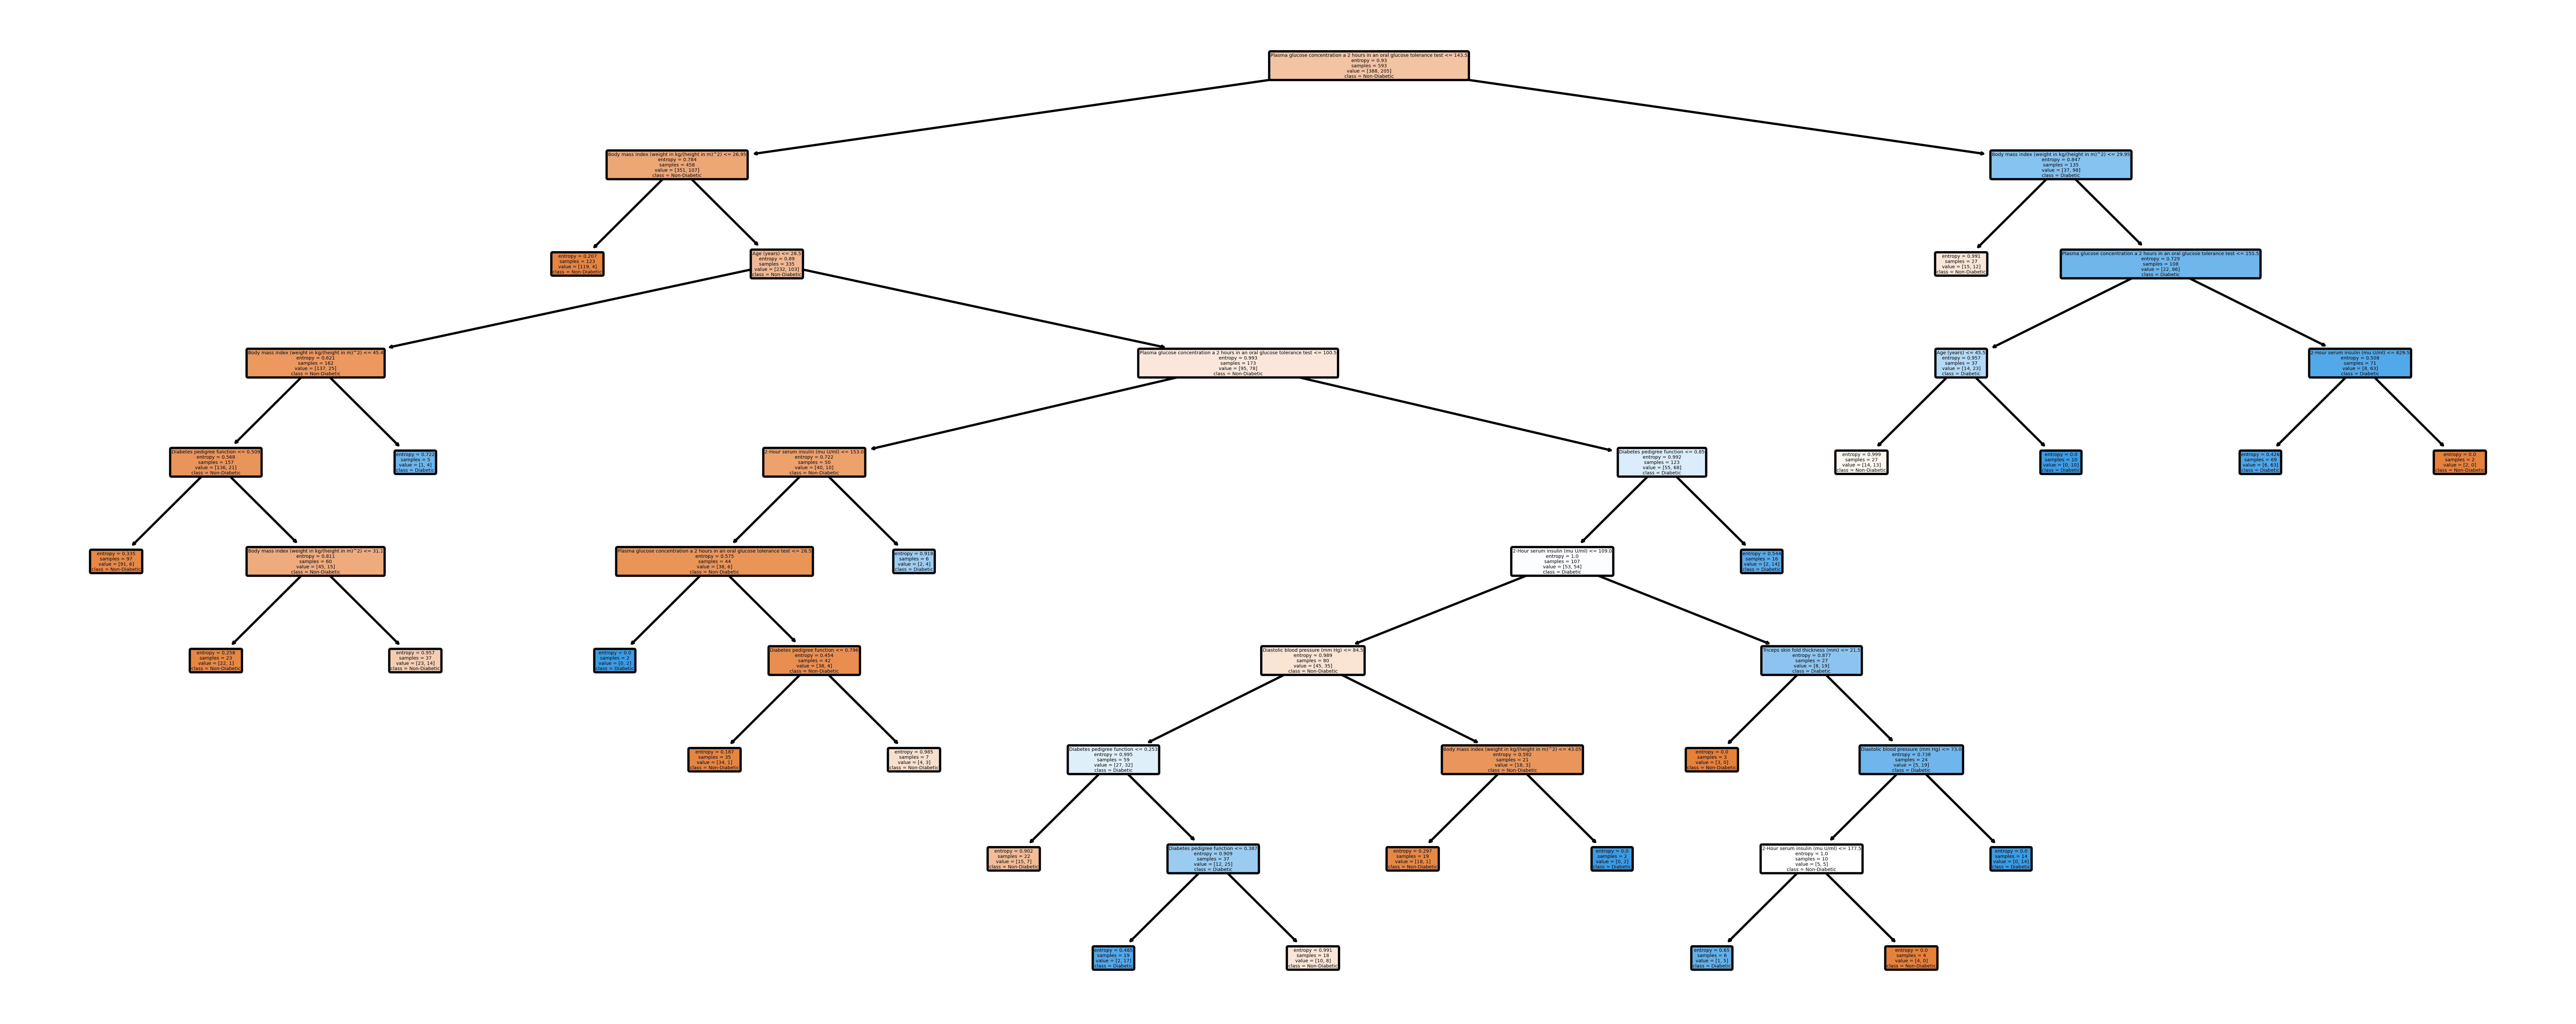

In [ ]:
plt.figure(figsize=(20,8),dpi=500)
plot_tree(first_dts[training_test_scores.index(max(training_test_scores))], filled=True, rounded=True, class_names=["Non-Diabetic","Diabetic"], feature_names=X.columns);

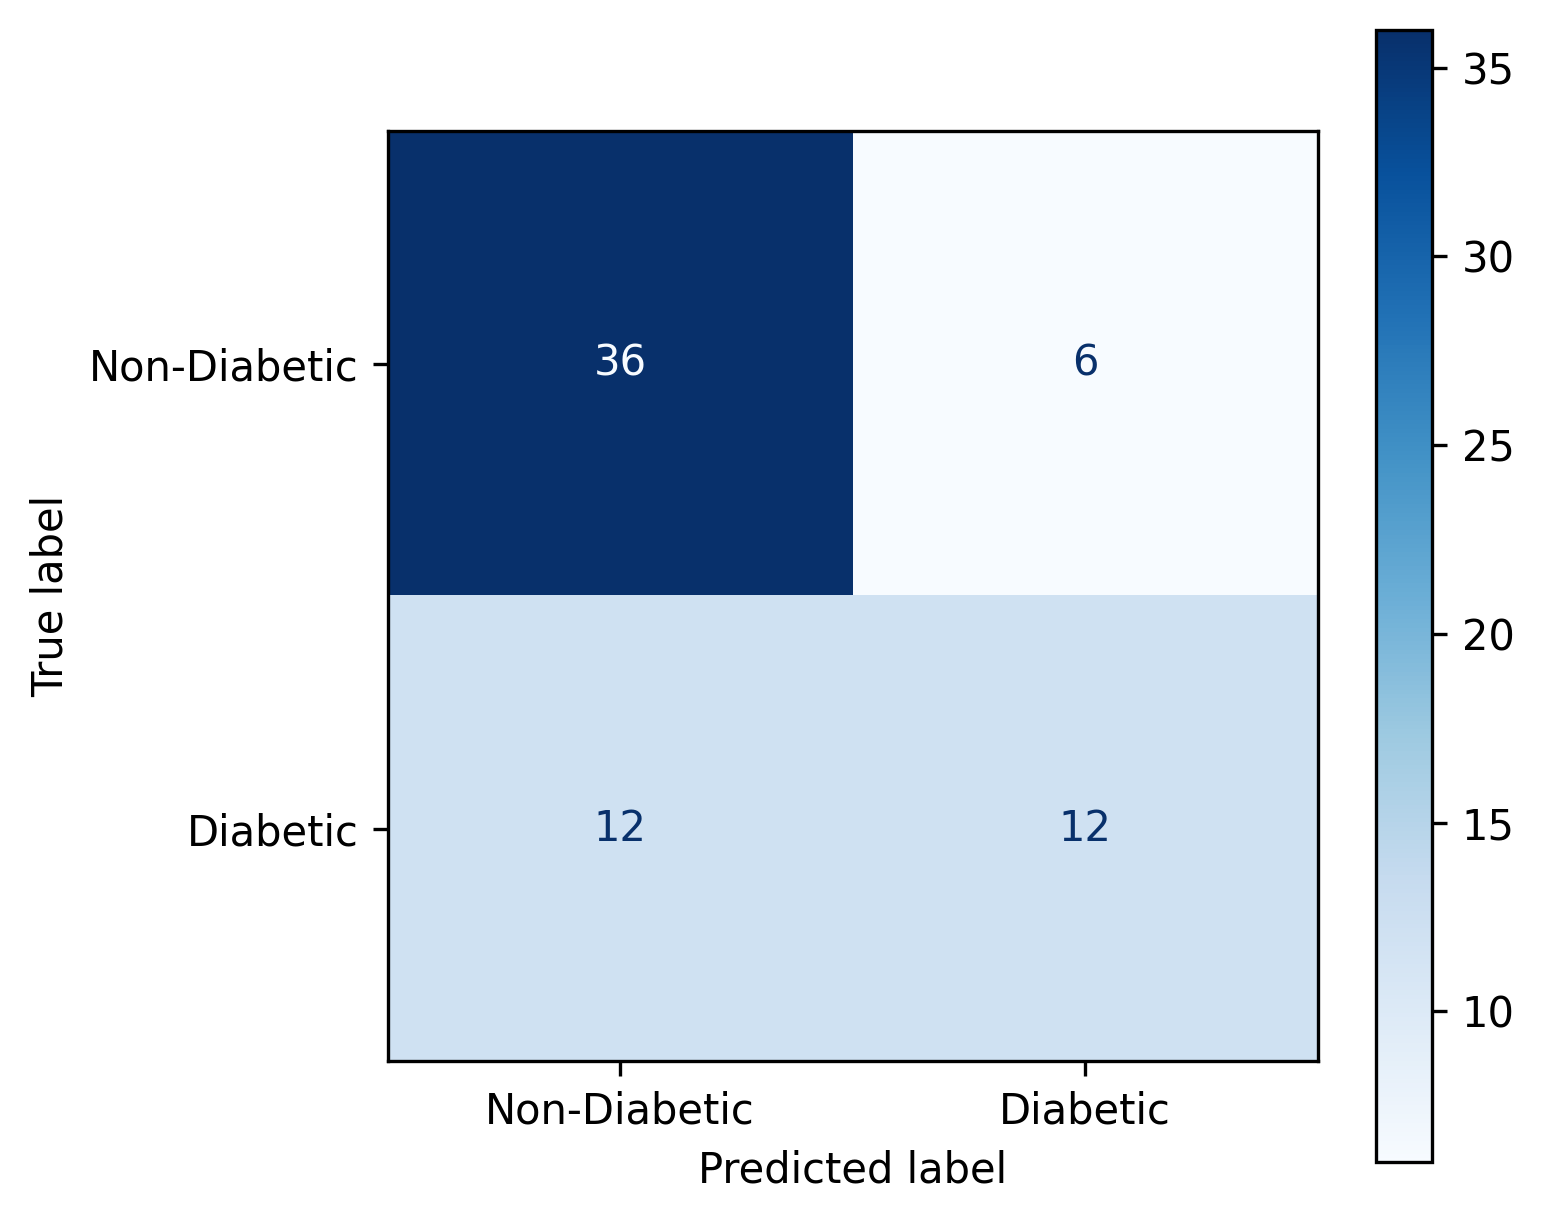

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5),dpi=300)
plot_confusion_matrix(first_dts[training_test_scores.index(max(training_test_scores))], X_fakeTest, Y_fakeTest, display_labels=["Non-Diabetic","Diabetic"],values_format='',cmap=plt.cm.Blues,ax=ax);



---

# This gives us the optimal tree for THIS training and training test set. But why should we assume that this is going to be the optimal tree? Let's use 5-fold cross validation to run through every single alpha and really find what value is going to work best.

---



In [ ]:
mean_scores=[]

for ccp_alpha in ccp_alphas:
    first_dt = DecisionTreeClassifier(criterion='entropy', random_state=20, ccp_alpha=ccp_alpha)
    scores=cross_val_score(first_dt, X_train, Y_train, cv=5)
    print(scores)
    mean_scores.append(np.mean(scores))

[0.6969697  0.6969697  0.75757576 0.63636364 0.64122137]
[0.6969697  0.6969697  0.75757576 0.63636364 0.64122137]
[0.6969697  0.6969697  0.75757576 0.63636364 0.64122137]
[0.6969697  0.6969697  0.75757576 0.63636364 0.64122137]
[0.6969697  0.6969697  0.75757576 0.63636364 0.64122137]
[0.6969697  0.6969697  0.75757576 0.63636364 0.64122137]
[0.70454545 0.68939394 0.75757576 0.64393939 0.64122137]
[0.71212121 0.70454545 0.75       0.64393939 0.64122137]
[0.71212121 0.70454545 0.75       0.64393939 0.64122137]
[0.71212121 0.70454545 0.75       0.64393939 0.64122137]
[0.71212121 0.70454545 0.75       0.64393939 0.64885496]
[0.71212121 0.70454545 0.74242424 0.64393939 0.64885496]
[0.70454545 0.70454545 0.72727273 0.64393939 0.64885496]
[0.70454545 0.70454545 0.72727273 0.64393939 0.64885496]
[0.70454545 0.71212121 0.72727273 0.64393939 0.64885496]
[0.70454545 0.71212121 0.72727273 0.64393939 0.64885496]
[0.70454545 0.71212121 0.72727273 0.64393939 0.64885496]
[0.70454545 0.71212121 0.727272

In [ ]:
mean_scores

[0.6858200323849178,
 0.6858200323849178,
 0.6858200323849178,
 0.6858200323849178,
 0.6858200323849178,
 0.6858200323849178,
 0.6873351839000694,
 0.6903654869303726,
 0.6903654869303726,
 0.6903654869303726,
 0.6918922044876245,
 0.6903770529724729,
 0.6858315984270184,
 0.6858315984270184,
 0.6873467499421698,
 0.6873467499421698,
 0.6873467499421698,
 0.6873467499421698,
 0.6873467499421698,
 0.6873467499421698,
 0.6873467499421698,
 0.6873467499421698,
 0.6949340735600278,
 0.6949340735600278,
 0.6949340735600278,
 0.6949340735600278,
 0.6919037705297247,
 0.6919037705297247,
 0.6919037705297247,
 0.6888734674994217,
 0.6888734674994217,
 0.6903886190145732,
 0.6903886190145732,
 0.6903886190145732,
 0.6888734674994217,
 0.6888734674994217,
 0.6888734674994217,
 0.6888734674994217,
 0.6888734674994217,
 0.6949340735600278,
 0.7009946796206339,
 0.7070437196391395,
 0.7009831135785334,
 0.7100855887115429,
 0.7116007402266944,
 0.7100855887115429,
 0.7176960444136017,
 0.7374392782

In [ ]:
print(mean_scores.index(max(mean_scores)))
print(max(mean_scores))

53
0.7510987739995374


In [ ]:
print(ccp_alphas[mean_scores.index(max(mean_scores))])
print(mean_scores[mean_scores.index(max(mean_scores))])

0.011220291688812285
0.7510987739995374


--- 

# We are going to plot the decision tree with the maximum mean value from the 5-fold validation.

---

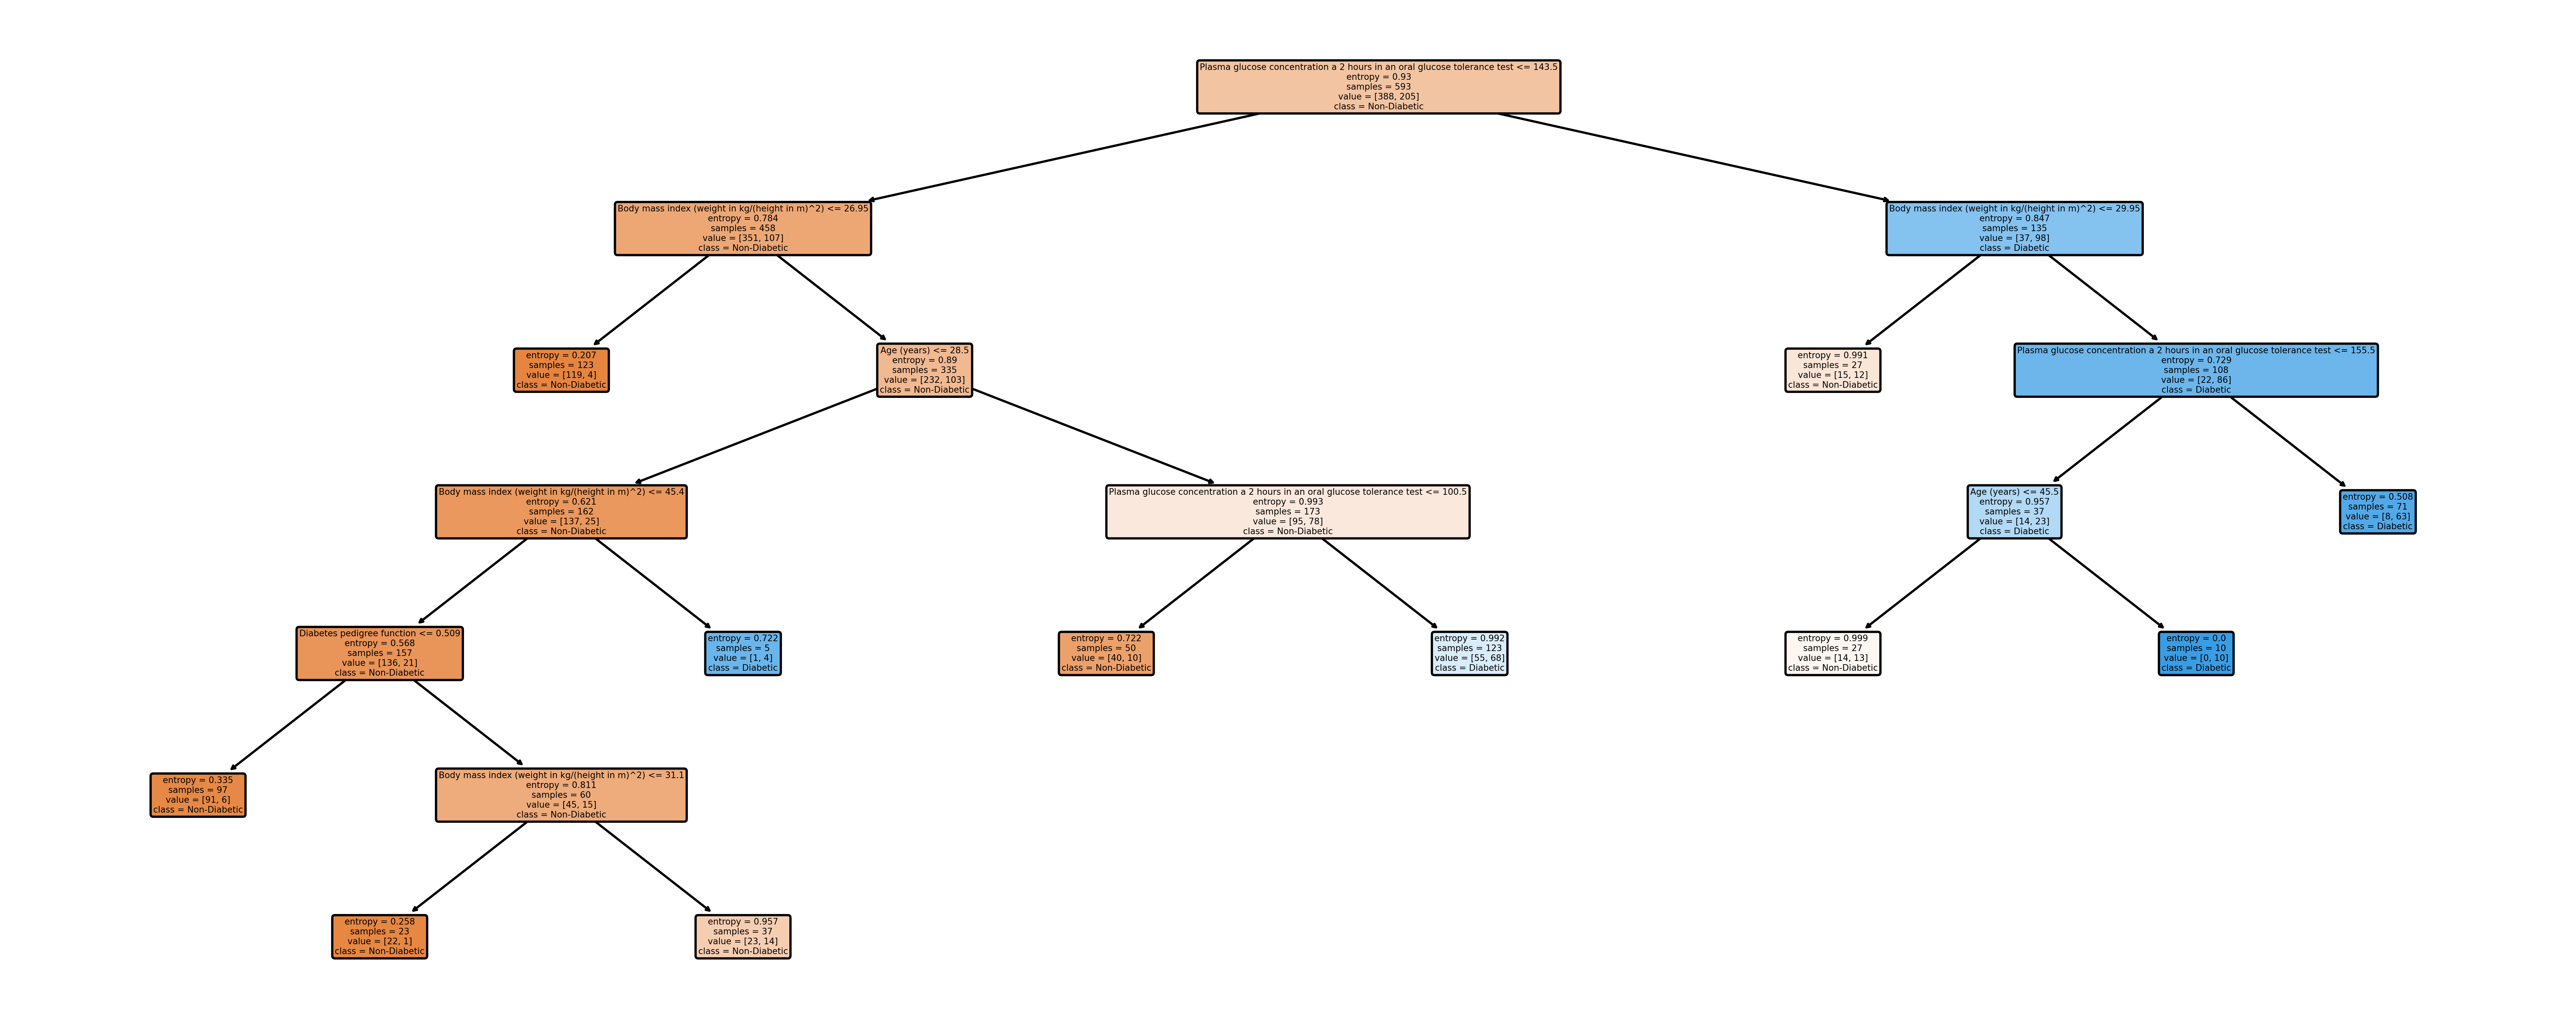

In [ ]:
plt.figure(figsize=(20,8),dpi=500)
plot_tree(first_dts[mean_scores.index(max(mean_scores))], filled=True, rounded=True, class_names=["Non-Diabetic","Diabetic"], feature_names=X.columns);

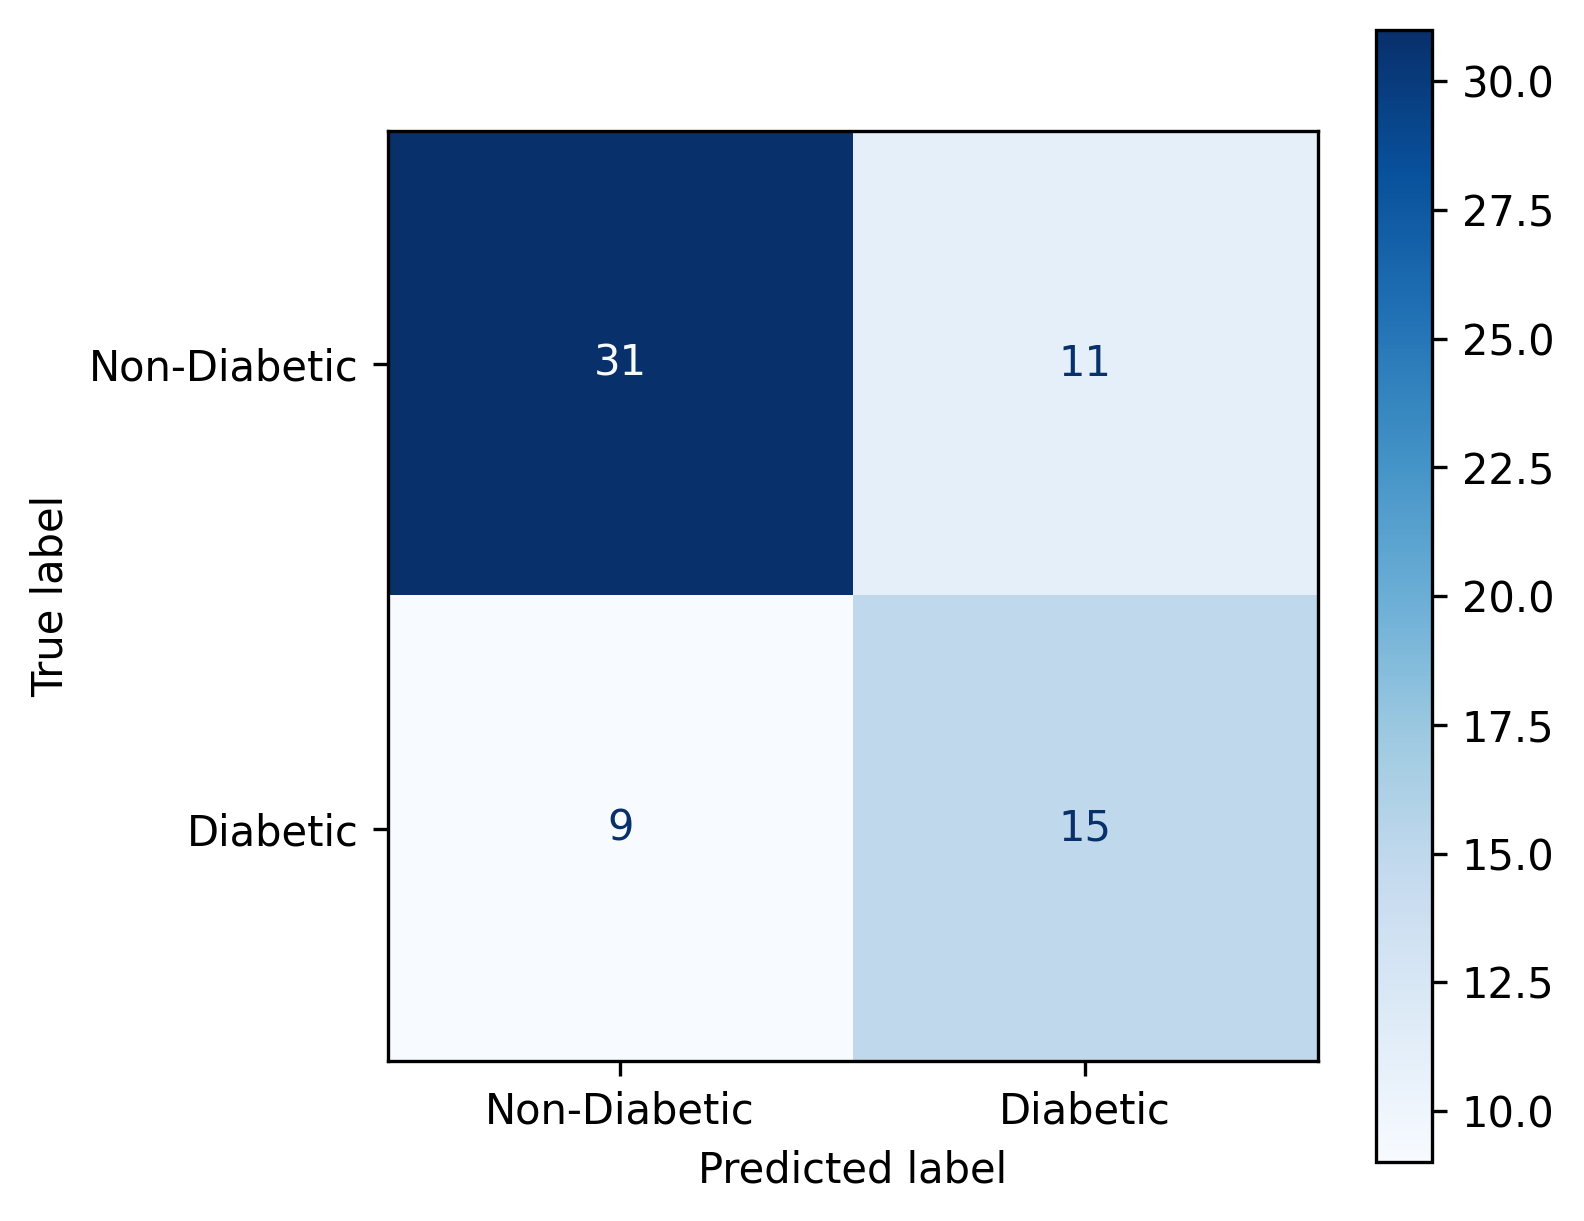

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5),dpi=300)
plot_confusion_matrix(first_dts[mean_scores.index(max(mean_scores))], X_fakeTest, Y_fakeTest, display_labels=["Non-Diabetic","Diabetic"],values_format='',cmap=plt.cm.Blues,ax=ax);

---

# So we note that even though this is a 'worse' confusion matrix compared to the one we found before when using the training test set, overall it performs the best.

---

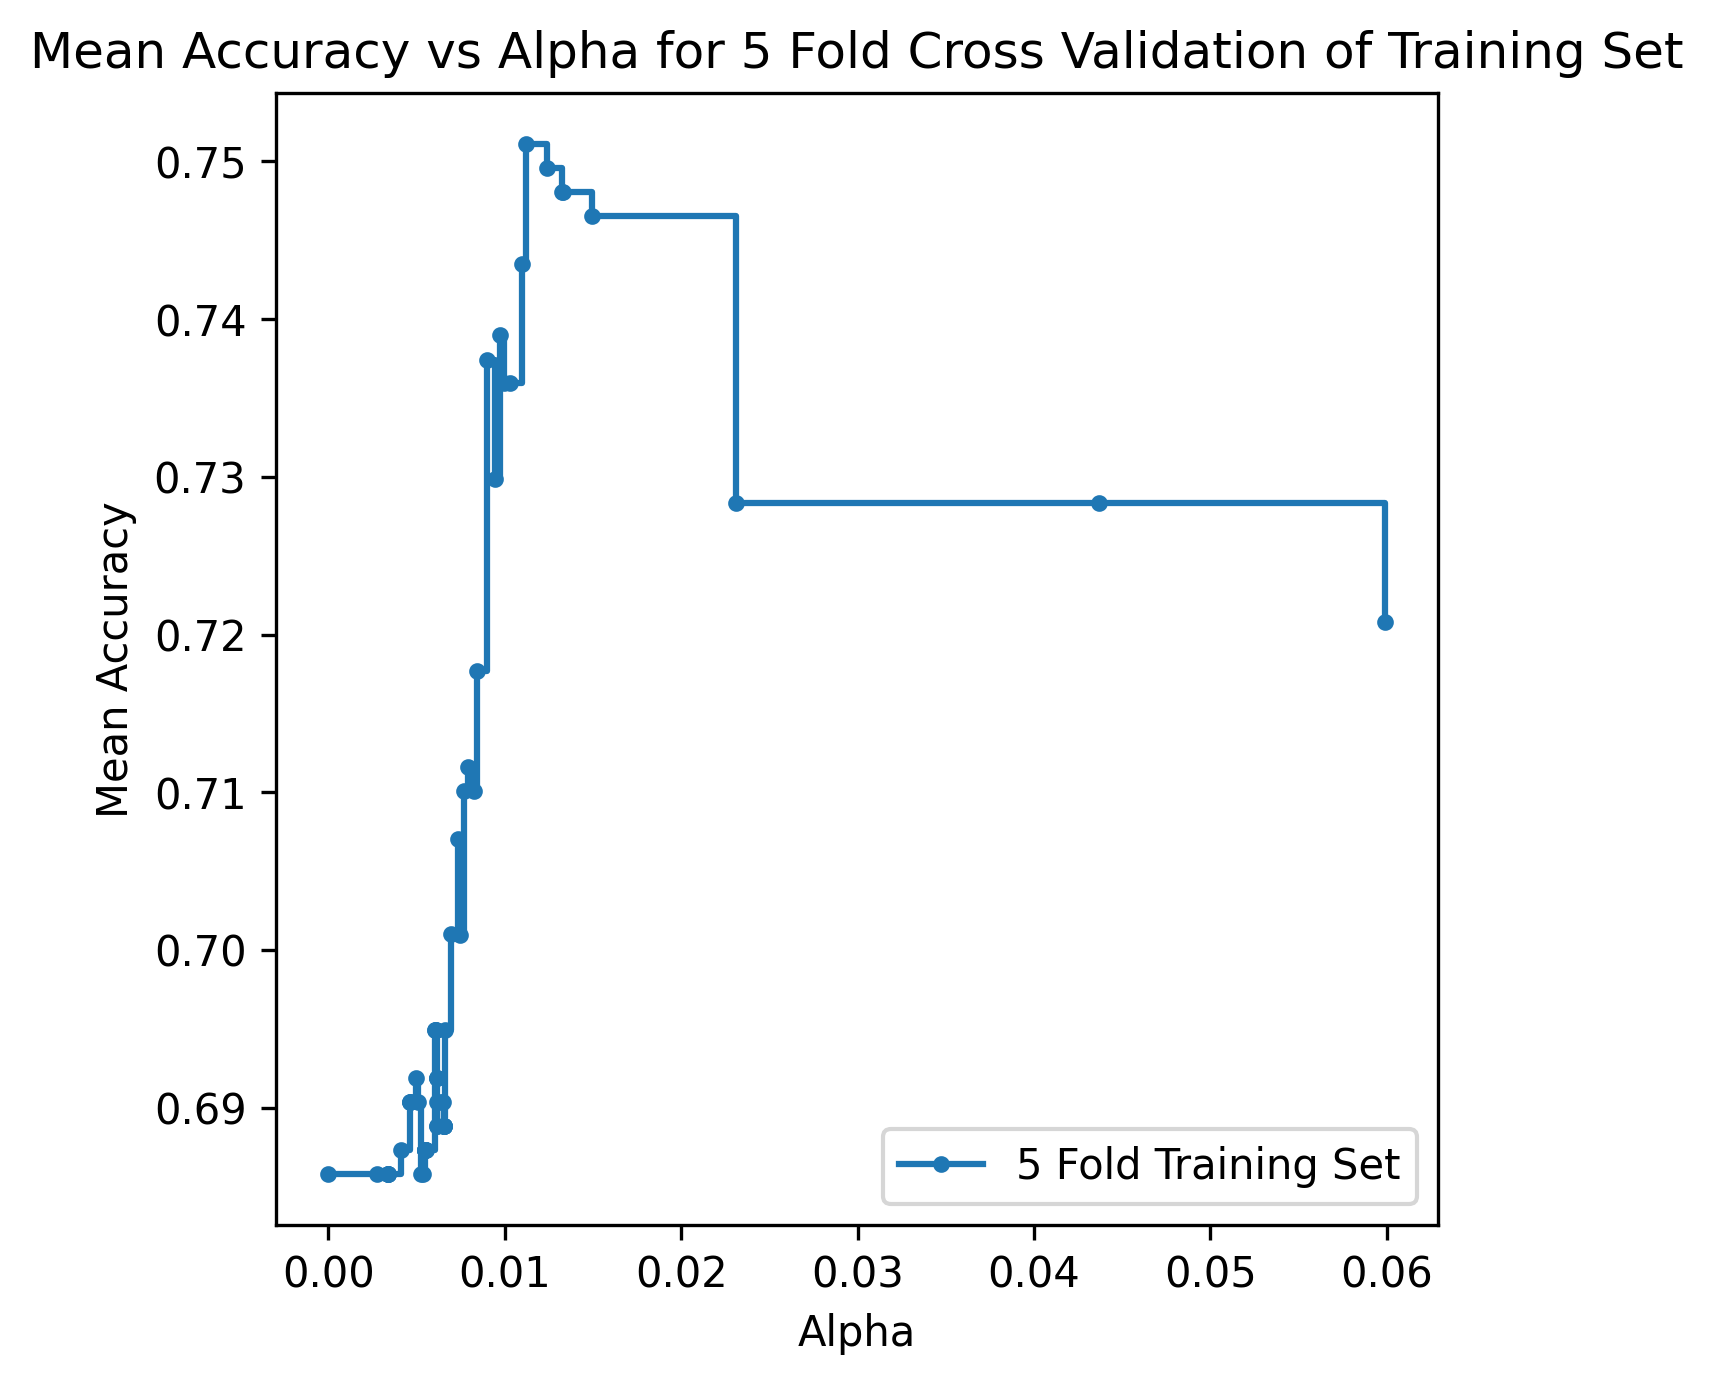

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5),dpi=300)
ax.set_xlabel("Alpha")
ax.set_ylabel("Mean Accuracy")
ax.set_title("Mean Accuracy vs Alpha for 5 Fold Cross Validation of Training Set")
ax.plot(ccp_alphas, mean_scores, marker='.', label="5 Fold Training Set",
        drawstyle="steps-post")
ax.legend(loc=4)
plt.show()

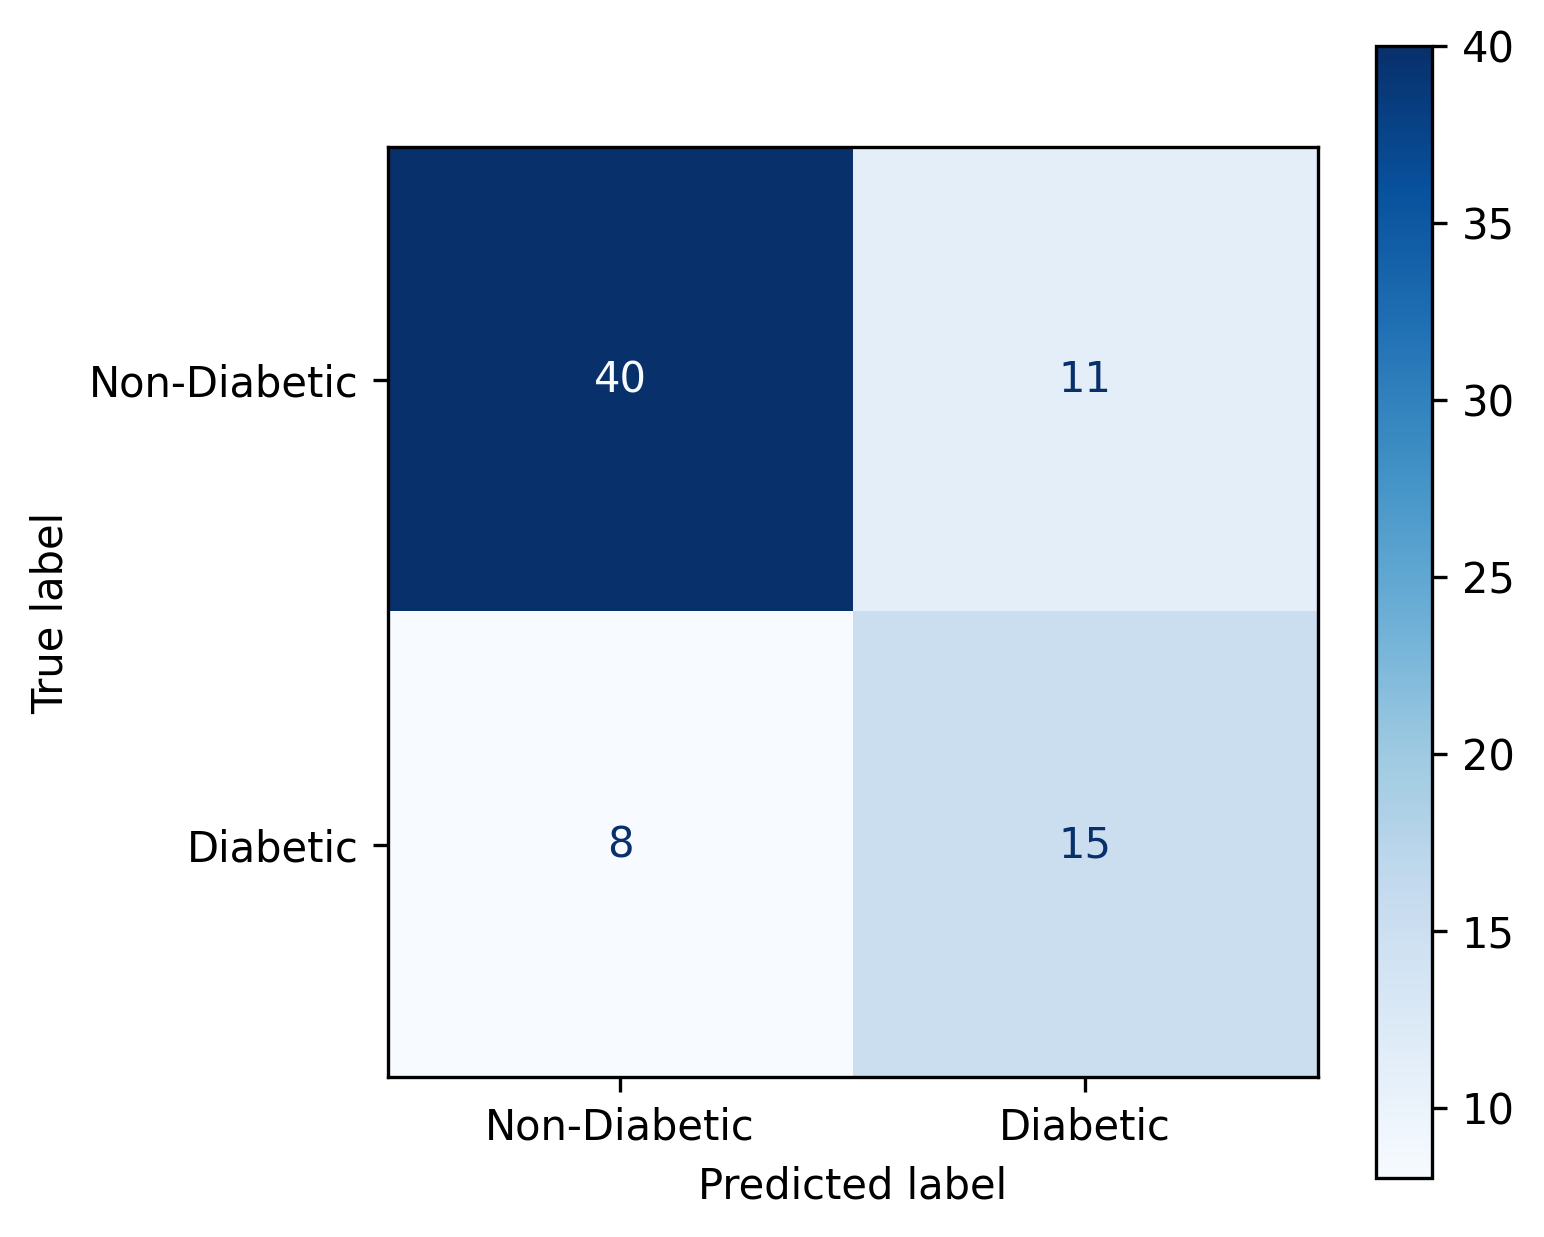

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5),dpi=300)
plot_confusion_matrix(first_dts[mean_scores.index(max(mean_scores))], X_test, Y_test, display_labels=["Non-Diabetic","Diabetic"],values_format='',cmap=plt.cm.Blues,ax=ax);

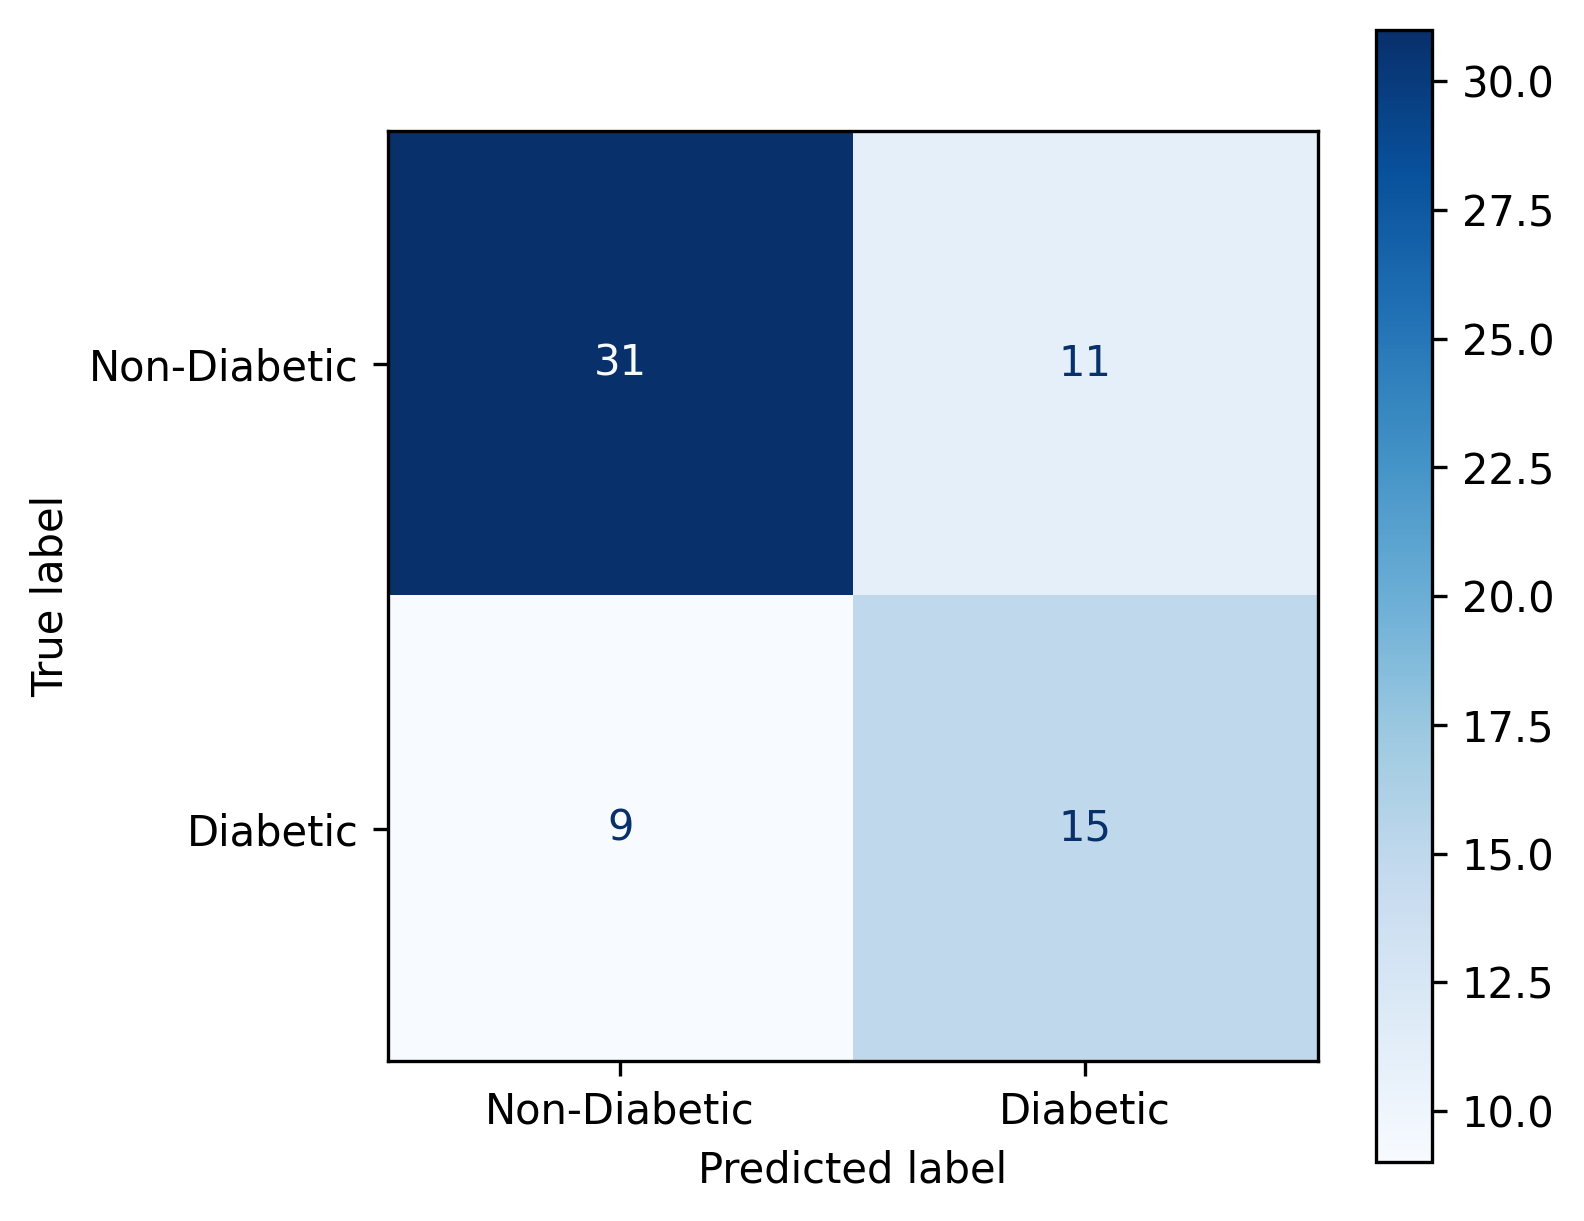

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5),dpi=300)
plot_confusion_matrix(first_dts[mean_scores.index(max(mean_scores))], X_fakeTest, Y_fakeTest, display_labels=["Non-Diabetic","Diabetic"],values_format='',cmap=plt.cm.Blues,ax=ax);

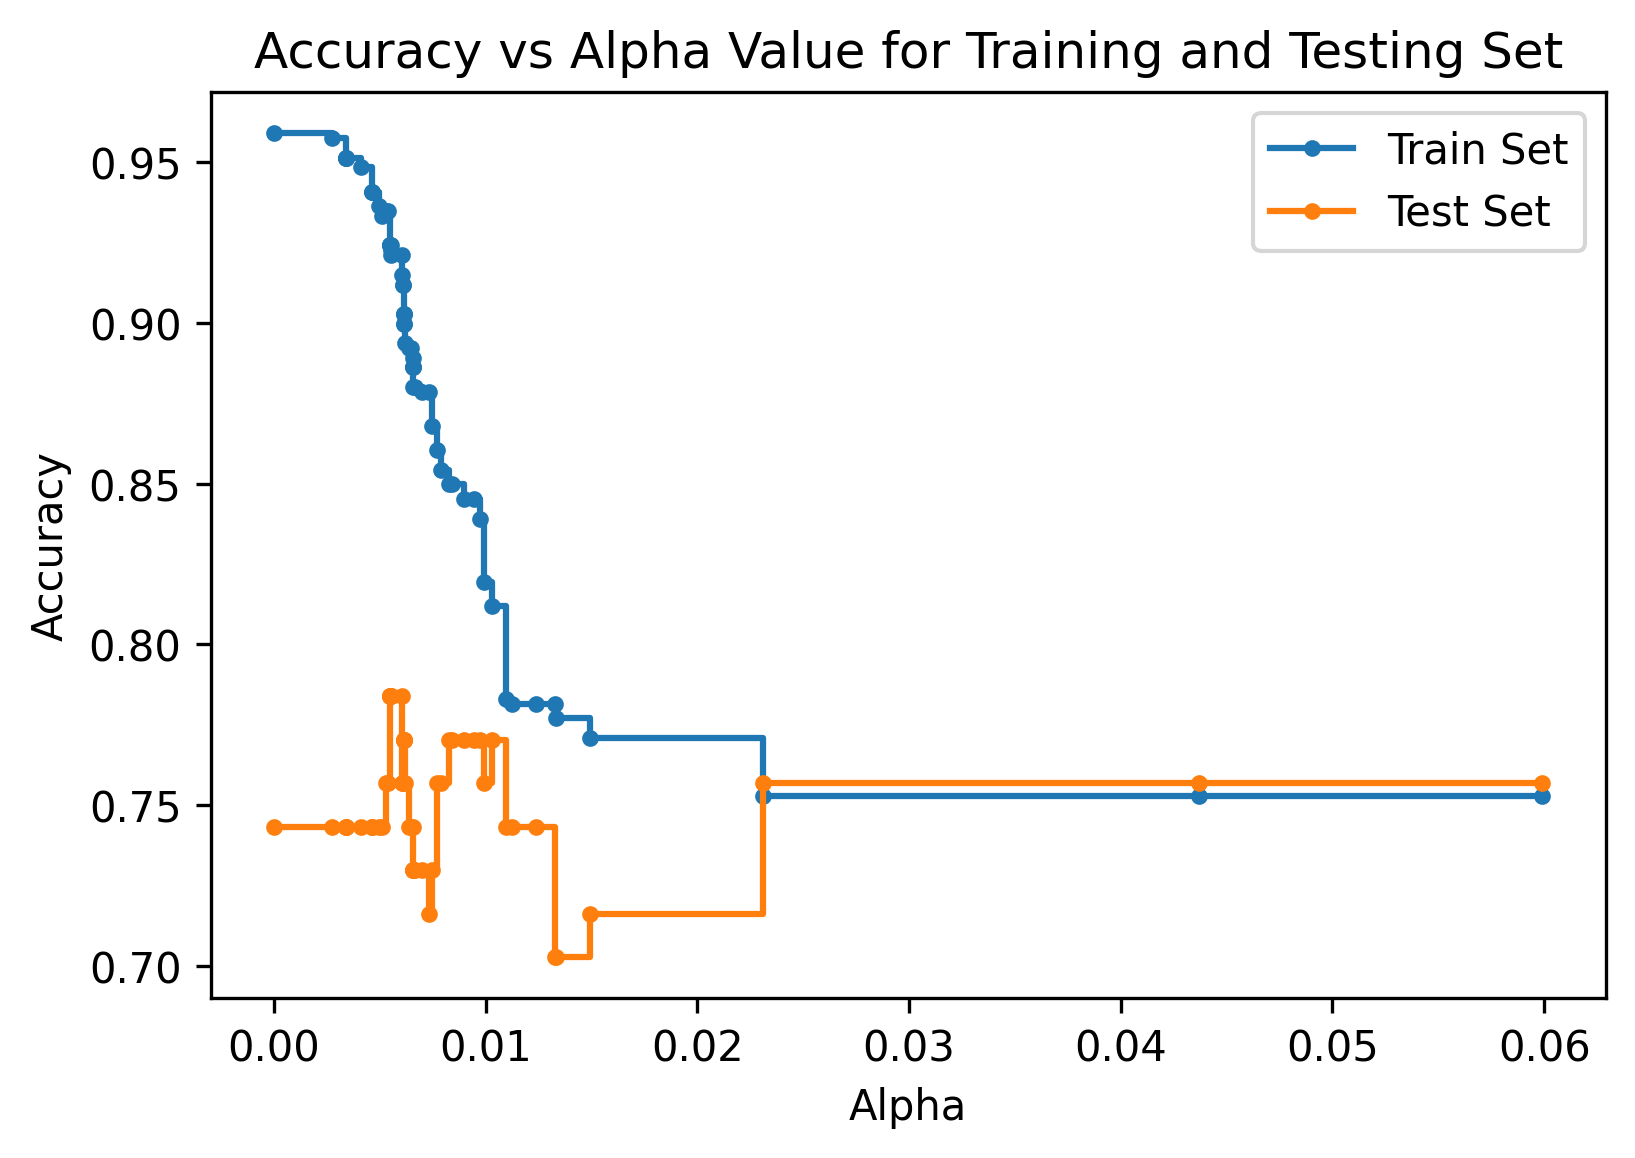

In [ ]:
train_scores = [first_dt.score(X_train, Y_train) for first_dt in first_dts]
test_scores = [first_dt.score(X_test, Y_test) for first_dt in first_dts]

fig, ax = plt.subplots(figsize=(6,4),dpi=300)
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha Value for Training and Testing Set")
ax.plot(ccp_alphas, train_scores, marker='.', label="Train Set",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='.', label="Test Set",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
print(mean_scores.index(max(mean_scores)))
print(test_scores.index(max(test_scores)))

53
14


In [ ]:
first_dts[mean_scores.index(max(mean_scores))]

DecisionTreeClassifier(ccp_alpha=0.011220291688812285, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=20, splitter='best')

In [ ]:
first_dts[test_scores.index(max(test_scores))]

DecisionTreeClassifier(ccp_alpha=0.00547236508910039, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=20, splitter='best')